# Building dashboards with streamlit

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static

C:\Users\Owner\anaconda3\envs\bikes\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Owner\anaconda3\envs\bikes\lib\site-packages\keplergl\keplergl.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shap

### Wrangle data

In [2]:
df = pd.read_csv('chicago_data.csv', index_col = 0)

In [3]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration         float64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
date                  object
avgTemp              float64
birth_year             int64
birth_year_2          object
age                    int64
value                  int64
bike_rides_daily       int64
merge_flag            object
dtype: object

In [4]:
# Create a month column 

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [5]:
# Create the season column

df['season'] = [
"winter" if (month == 12 or 1 <= month <= 4)
    else "spring" if (4 < month <= 5)
    else "summer" if (6 <= month <= 9)
    else "fall"
for month in df['month']
    ]

In [6]:
df.shape

(3603082, 22)

In [7]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       'birth_year', 'birth_year_2', 'age', 'value', 'bike_rides_daily',
       'merge_flag', 'month', 'season'],
      dtype='object')

In [8]:
df.rename(columns = {'from_station_name':'start_station_name','to_station_name' : 'end_station_name'}, inplace = True)

In [9]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'start_station_name', 'to_station_id',
       'end_station_name', 'usertype', 'gender', 'birthyear', 'date',
       'avgTemp', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag', 'month', 'season'],
      dtype='object')

## Create the plotly charts

In [12]:
## Groupby

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

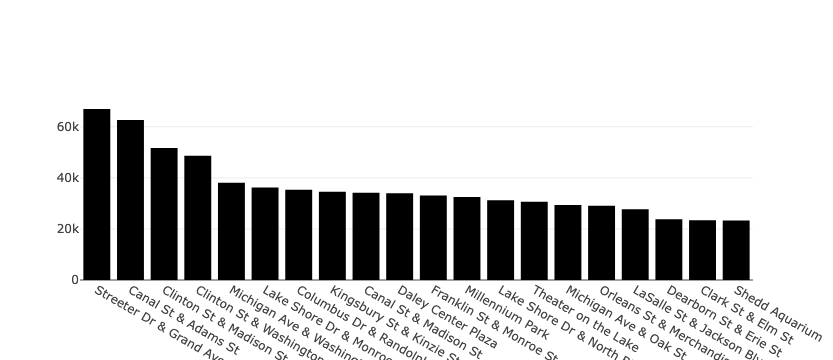

In [13]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

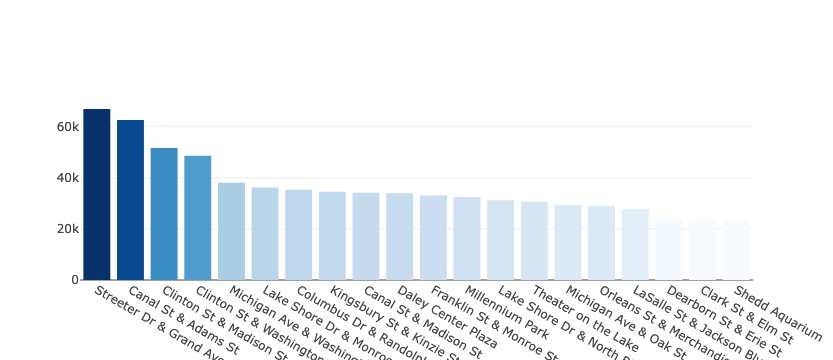

In [14]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Blues'}))
fig.show()

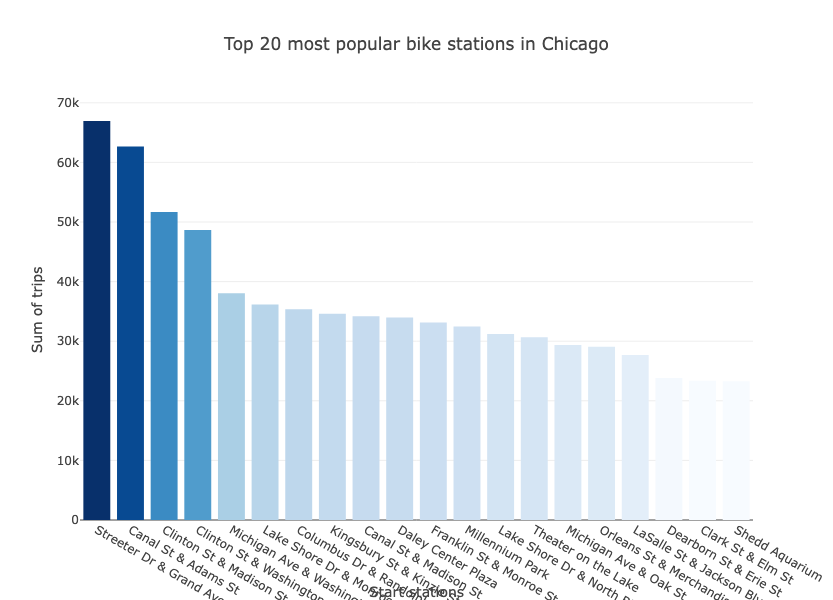

In [15]:
## Bar chart

fig.update_layout(
    title = 'Top 20 most popular bike stations in Chicago',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
    width = 900, height = 600
)

#### _The next chart's output has been deleted because it inflates the notebook's size a lot_ 

In [ ]:
# Line chart

fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(
go.Scatter(x = df['date'], y = df['bike_rides_daily'], name = 'Daily bike rides'),
secondary_y = False
)

fig.add_trace(
go.Scatter(x=df['date'], y = df['avgTemp'], name = 'Daily temperature'),
secondary_y=True
)

In [16]:
import gc # this is a garbage collector
gc.collect()

180

In [17]:
# Save the top 20 stations as a csv file 

top20.to_csv('top20.csv')

In [18]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'start_station_name', 'to_station_id',
       'end_station_name', 'usertype', 'gender', 'birthyear', 'date',
       'avgTemp', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag', 'month', 'season'],
      dtype='object')

In [20]:
df_1.columns

Index(['start_station_name', 'end_station_name', 'date', 'avgTemp', 'value',
       'bike_rides_daily', 'season'],
      dtype='object')

### Reduce the row and column count

In [19]:
# Create a copy with fewer columns

df_1 = df.drop(columns = {'trip_id', 'start_time', 'end_time', 'bikeid',
       'tripduration', 'from_station_id', 'to_station_id', 'usertype', 'gender', 'birthyear',
                          'birth_year', 'birth_year_2', 'age','merge_flag', 'month'}) 

##### Create a random split

In [24]:
np.random.seed(32)
red = np.random.rand(len(df_1)) <= 0.92

In [25]:
small = df_1[~red]

In [26]:
small.shape

(287405, 7)

In [27]:
small.to_csv('reduced_data_to_plot_7.csv',index = False)

In [28]:
df_1.to_csv('reduced_data_to_plot.csv')